Import Library

In [1]:
import pandas as pd
import numpy as np

Import dataset

In [2]:
url= (r"C:\Users\chris\Downloads\Property Dataset - Clustering - Data Rumah (2).csv")
data = pd.read_csv(url)
data = data.iloc[1:, :]
data

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


## Data Prepocesing

Cek data duplikat

In [3]:
data.duplicated().sum()

2

Menghilangkan duplikasi

In [4]:
data.drop_duplicates(keep=False, inplace=True)
data.duplicated().sum()

0

Cek data kosong

In [5]:
data.isna().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

Melengkapi data yang kosong

In [6]:
import random
arah = ["Utara","Selatan","Timur","Barat"]
print(random.choice(arah))
posisi = ["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
print(random.choice(posisi))
lebar = ["< 1 Mobil","1-2 Mobil","> 2 Mobil"]
print(random.choice(lebar))

Utara
Tikungan/Hook
> 2 Mobil


Memasukan data kosong

In [7]:
data.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
data.dropna(subset=["Tingkat/Lantai "],inplace=True)
data["Arah Hadap Rumah"] = data['Arah Hadap Rumah'].fillna(random.choice(arah))
data["Posisi Rumah"] = data['Posisi Rumah'].fillna(random.choice(posisi))
data["Lebar Jalan Depan Rumah (ROW)"] = data['Lebar Jalan Depan Rumah (ROW)'].fillna(random.choice(lebar))

Cek data setelah diisi

In [8]:
data.isna().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Lakukan label encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data['Area Category'] = lb.fit_transform(data['Area Category'])
data['Nama Daerah'] = lb.fit_transform(data['Nama Daerah'])
data['Terjual/Belum'] = lb.fit_transform(data['Terjual/Belum'])
data['Arah Hadap Rumah'] = lb.fit_transform(data['Arah Hadap Rumah'])
data['Posisi Rumah'] = lb.fit_transform(data['Posisi Rumah'])
data['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(data['Lebar Jalan Depan Rumah (ROW)'])

In [10]:
display(data.dtypes)

Area Category                      int32
Nama Daerah                        int32
Luas Tanah (m2)                  float64
Luas Bangunan (m2)               float64
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                      int32
Arah Hadap Rumah                   int32
Posisi Rumah                       int32
Lebar Jalan Depan Rumah (ROW)      int32
dtype: object

In [11]:
data['Luas Tanah (m2)'] = data['Luas Tanah (m2)'].astype(int)
data['Luas Bangunan (m2)'] = data['Luas Bangunan (m2)'].astype(int)
data['Jumlah Kamar'] = data['Jumlah Kamar'].astype(int)
data['Jumlah Kamar Mandi'] = data['Jumlah Kamar Mandi'].astype(int)
data['Tingkat/Lantai '] = data['Tingkat/Lantai '].astype(int)

In [12]:
data = data[data['Harga Penawaran (dari Owner)'] != " "]

Melakukan Scaling data

In [13]:
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
df_scaled = sd_scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
df_scaled.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.665464,1.031345,-0.975915,-0.968692,-1.375557,-1.431742,0.318296,-0.569614,0.0,0.144292,-0.833797,-0.051187
1,1.025591,-0.350537,-0.287739,-0.457468,0.447714,0.401214,0.318296,-0.282054,0.0,-0.994854,-2.834909,-1.074923
2,0.128573,-0.350537,-0.204175,-0.085669,0.447714,1.012199,0.318296,-0.234370,0.0,1.283437,-0.833797,-1.074923
3,-0.768446,-0.350537,0.597058,1.540953,0.447714,1.012199,0.318296,-0.007870,0.0,-2.133999,-0.833797,-1.074923
4,-0.768446,-0.350537,1.088612,1.215628,0.447714,1.623184,0.318296,0.683552,0.0,0.144292,-0.833797,-1.074923


## K-MEANS Clustering

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

model = kmeans.fit_predict(df_scaled)
model
data['K-MEANS'] = model
data

<ipython-input-14-4b926e13454d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['K-MEANS'] = model


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS
1,0,98,30,60,2,1,2,287799000,0,2,2,1,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0
5,1,48,450,530,5,6,2,10800000000,0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,47,34,2,1,1,450000000,0,3,4,2,1
304,2,103,300,212,4,4,1,5250000000,0,1,4,2,1
305,1,72,102,156,4,2,2,1950000000,0,1,2,0,1
306,3,103,98,170,4,3,2,1550000000,0,2,2,2,0


C:\Users\chris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


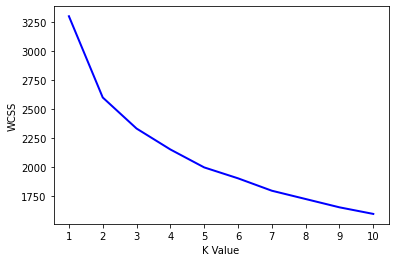

In [15]:
from matplotlib import pyplot as plt
wcss=[]
X2=df_scaled
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [16]:
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")
print("The best K Value for you model is", findknee.elbow)

The best K Value for you model is 3


Mencari nilai tengah / modus

In [17]:
data.groupby('K-MEANS').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
K-MEANS,,,,,,,,,,,,,
0,1,11,202.115108,269.633094,4.791367,3.892086,2.057554,inf,0,1,2,1.071942,139
1,3,11,109.719298,111.061404,2.798246,1.912281,1.535088,inf,0,2,2,0.877193,114
2,2,11,594.872340,646.595745,6.255319,5.191489,1.914894,inf,0,3,4,1.404255,47


## Dendrogram Hierechical

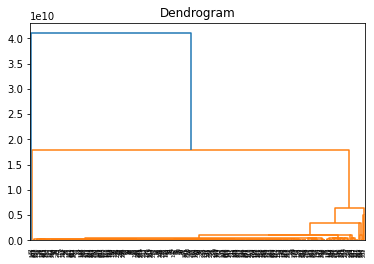

In [18]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(data, method = 'single'))
plt.title('Dendrogram')
plt.show()

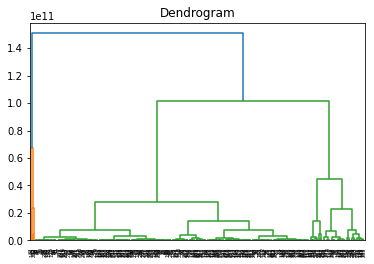

In [19]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.show()

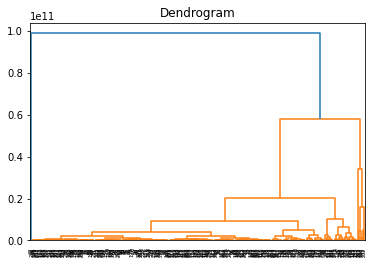

In [20]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(data, method = 'complete'))
plt.title('Dendrogram')
plt.show()

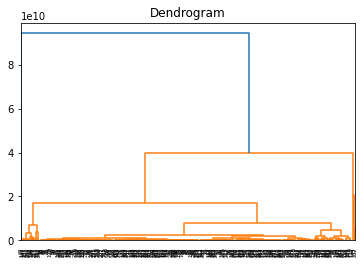

In [21]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(data, method = 'average'))
plt.title('Dendrogram')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Huh = hc_model.fit_predict(df_scaled)

In [23]:
data_new = data.copy()
data_new['Hierarchical'] = Huh
data_new

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS,Hierarchical
1,0,98,30,60,2,1,2,287799000,0,2,2,1,1,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0,2
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0,2
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0,0
5,1,48,450,530,5,6,2,10800000000,0,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,47,34,2,1,1,450000000,0,3,4,2,1,1
304,2,103,300,212,4,4,1,5250000000,0,1,4,2,1,2
305,1,72,102,156,4,2,2,1950000000,0,1,2,0,1,2
306,3,103,98,170,4,3,2,1550000000,0,2,2,2,0,2


In [24]:
data_new.groupby('Hierarchical').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
Hierarchical,,,,,,,,,,,,,
0,1,11,522.253968,582.000000,5.952381,5.079365,1.873016,inf,0,3,4,1.444444,63
1,3,"[11, 30, 94]",111.510204,116.897959,2.836735,1.877551,1.500000,inf,0,2,2,0.673469,98
2,1,11,177.920863,233.151079,4.503597,3.589928,2.057554,inf,0,1,2,1.136691,139
